In [158]:
import pandas as pd
import numpy as np

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
!pip install xgboost 
from xgboost import XGBRegressor
# Candlestick

import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from itertools import cycle
!pip install nbformat==5.1.2
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
Data_FPT = pd.read_csv('D:\DACNTT - Stock Price Prediction/FPT.csv')
# Data_FPT.head()
Data_FPT_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - FPT.csv')
# Data_FPT_Financial_index.head()

Data_HPG = pd.read_csv('D:\DACNTT - Stock Price Prediction/HPG.csv')
# Data_HPG.head()
Data_HPG_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - HPG.csv')
# Data_HPG_Financial_index.head()

Data_MBB = pd.read_csv('D:\DACNTT - Stock Price Prediction/MBB.csv')
# Data_MBB.head()
Data_MBB_Financial_index = pd.read_csv('D:\DACNTT - Stock Price Prediction/Financial index - MBB.csv')
# Data_MBB_Financial_index.head()

In [3]:
df_FPT = pd.DataFrame(Data_FPT)
df_FPT_Financial_index = pd.DataFrame(Data_FPT_Financial_index)

df_HPG = pd.DataFrame(Data_HPG)
df_HPG_Financial_index = pd.DataFrame(Data_HPG_Financial_index)

df_MBB = pd.DataFrame(Data_MBB)
df_MBB_Financial_index = pd.DataFrame(Data_MBB_Financial_index)

In [4]:
rows, col = df_FPT.shape
print ("Dimensions of dataset FPT.csv: {}" . format (df_FPT.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_FPT_Financial_index.shape
print ("Dimensions of dataset Financial index - FPT.csv : {}" . format (df_FPT_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)

rows, col = df_HPG.shape
print ("Dimensions of dataset HPG.csv: {}" . format (df_HPG.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_HPG_Financial_index.shape
print ("Dimensions of dataset Financial index - HPG.csv: {}" . format (df_HPG_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)


rows, col = df_MBB.shape
print ("Dimensions of dataset MBB.csv: {}" . format (df_MBB.shape))
print ('Rows:', rows, '\nColumns:', col)
rows, col = df_MBB_Financial_index.shape
print ("Dimensions of dataset Financial index - MBB.csv: {}" . format (df_MBB_Financial_index.shape))
print ('Rows:', rows, '\nColumns:', col)



Dimensions of dataset FPT.csv: (2786, 12)
Rows: 2786 
Columns: 12
Dimensions of dataset Financial index - FPT.csv : (44, 4)
Rows: 44 
Columns: 4
Dimensions of dataset HPG.csv: (2786, 12)
Rows: 2786 
Columns: 12
Dimensions of dataset Financial index - HPG.csv: (44, 4)
Rows: 44 
Columns: 4
Dimensions of dataset MBB.csv: (2787, 12)
Rows: 2787 
Columns: 12
Dimensions of dataset Financial index - MBB.csv: (44, 4)
Rows: 44 
Columns: 4


In [5]:
# checking data types of columns
print(Data_FPT.dtypes)
print(Data_FPT_Financial_index.dtypes)
print(Data_HPG.dtypes)
print(Data_HPG_Financial_index.dtypes)
print(Data_MBB.dtypes)
print(Data_MBB_Financial_index.dtypes)

Mã cổ phiếu        object
Ngày giao dịch     object
Giá đóng cửa      float64
Giá điều chỉnh     object
Thay đổi           object
GDKL_KL            object
GDKL_GT           float64
GDTT_KL            object
GDTT_GT            object
Giá mở cửa        float64
Giá cao nhất      float64
Giá thấp nhất     float64
dtype: object
Mã cổ phiếu                                          object
Chỉ số tài chính theo quý                            object
Chỉ số giá thị trường trên thu nhập (P/E)           float64
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    float64
dtype: object
Mã cổ phiếu        object
Ngày giao dịch     object
Giá đóng cửa      float64
Giá điều chỉnh     object
Thay đổi           object
GDKL_KL            object
GDKL_GT            object
GDTT_KL            object
GDTT_GT           float64
Giá mở cửa        float64
Giá cao nhất      float64
Giá thấp nhất     float64
dtype: object
Mã cổ phiếu                                          object
Chỉ số tài chính theo quý         

In [6]:
#FPT
df_FPT2 = df_FPT.copy()   
df_FPT2['Ngày giao dịch'] = pd.to_datetime(df_FPT2['Ngày giao dịch'],format="%d/%m/%Y",utc=True) 
#df_FPT2['Ngày giao dịch'] = df_FPT2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_FPT2['Giá điều chỉnh'] = df_FPT2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_FPT2['Giá điều chỉnh'] = df_FPT2['Giá điều chỉnh'].astype(float)
# Assuming df_FPT2 is your DataFrame
df_FPT2['Thay đổi'] = df_FPT2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_FPT2['GDKL_KL'] = df_FPT2['GDKL_KL'].str.replace(',', '').astype(float)
df_FPT2['GDTT_KL'] = df_FPT2['GDTT_KL'].str.replace(',', '').astype(float)
df_FPT2['GDTT_GT'] = df_FPT2['GDTT_GT'].str.replace(',', '').astype(float)
df_FPT2.info()

#HPG
df_HPG2 = df_HPG.copy()   
df_HPG2['Ngày giao dịch'] = pd.to_datetime(df_HPG2['Ngày giao dịch'],format="%d/%m/%Y",utc=True)  
#df_HPG2['Ngày giao dịch'] = df_HPG2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_HPG2['Giá điều chỉnh'] = df_HPG2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_HPG2['Giá điều chỉnh'] = df_HPG2['Giá điều chỉnh'].astype(float)
# # Assuming df_HPG2 is your DataFrame
df_HPG2['Thay đổi'] = df_HPG2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_HPG2['GDKL_KL'] = df_HPG2['GDKL_KL'].str.replace(',', '').astype(float)
df_HPG2['GDKL_GT'] = df_HPG2['GDKL_GT'].str.replace(',', '').astype(float)
df_HPG2['GDTT_KL'] = df_HPG2['GDTT_KL'].str.replace(',', '').astype(float)
df_HPG2.info()

#MBB
df_MBB2 = df_MBB.copy()
df_MBB2['Ngày giao dịch'] = pd.to_datetime(df_MBB2['Ngày giao dịch'],format="%d/%m/%Y",utc=True) 
#df_MBB2['Ngày giao dịch'] = df_MBB2['Ngày giao dịch'].dt.strftime("%d-%m-%Y")
df_MBB2['Giá điều chỉnh'] = df_MBB2['Giá điều chỉnh'].replace('--', 0).astype(float)
df_MBB2['Giá điều chỉnh'] = df_MBB2['Giá điều chỉnh'].astype(float)
df_MBB2['Thay đổi'] = df_MBB2['Thay đổi'].str.extract('([\d.]+)').astype(float)
df_MBB2['GDKL_KL'] = df_MBB2['GDKL_KL'].str.replace(',', '').astype(float)
df_MBB2['GDKL_GT'] = df_MBB2['GDKL_GT'].str.replace(',', '').astype(float)
df_MBB2['GDTT_KL'] = df_MBB2['GDTT_KL'].str.replace(',', '').astype(float)
df_MBB2['GDTT_GT'] = df_MBB2['GDTT_GT'].str.replace(',', '').astype(float)
df_MBB2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Mã cổ phiếu     2786 non-null   object             
 1   Ngày giao dịch  2786 non-null   datetime64[ns, UTC]
 2   Giá đóng cửa    2786 non-null   float64            
 3   Giá điều chỉnh  2786 non-null   float64            
 4   Thay đổi        2786 non-null   float64            
 5   GDKL_KL         2786 non-null   float64            
 6   GDKL_GT         2786 non-null   float64            
 7   GDTT_KL         2786 non-null   float64            
 8   GDTT_GT         2786 non-null   float64            
 9   Giá mở cửa      2786 non-null   float64            
 10  Giá cao nhất    2786 non-null   float64            
 11  Giá thấp nhất   2786 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), object(1)
memory usage: 261.3+ KB
<class 'pandas.c

In [7]:
# Checking na value
df_FPT2.isna().any()

Mã cổ phiếu       False
Ngày giao dịch    False
Giá đóng cửa      False
Giá điều chỉnh    False
Thay đổi          False
GDKL_KL           False
GDKL_GT           False
GDTT_KL           False
GDTT_GT           False
Giá mở cửa        False
Giá cao nhất      False
Giá thấp nhất     False
dtype: bool

In [8]:
#checking for missing values
print(Data_FPT.isnull().sum())
print(Data_FPT_Financial_index.isnull().sum())

print(Data_HPG.isnull().sum())
print(Data_HPG_Financial_index.isnull().sum())

print(Data_MBB.isnull().sum())
print(Data_MBB_Financial_index.isnull().sum())

Mã cổ phiếu       0
Ngày giao dịch    0
Giá đóng cửa      0
Giá điều chỉnh    0
Thay đổi          0
GDKL_KL           0
GDKL_GT           0
GDTT_KL           0
GDTT_GT           0
Giá mở cửa        0
Giá cao nhất      0
Giá thấp nhất     0
dtype: int64
Mã cổ phiếu                                         0
Chỉ số tài chính theo quý                           0
Chỉ số giá thị trường trên thu nhập (P/E)           0
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    0
dtype: int64
Mã cổ phiếu       0
Ngày giao dịch    0
Giá đóng cửa      0
Giá điều chỉnh    0
Thay đổi          0
GDKL_KL           0
GDKL_GT           0
GDTT_KL           0
GDTT_GT           0
Giá mở cửa        0
Giá cao nhất      0
Giá thấp nhất     0
dtype: int64
Mã cổ phiếu                                         0
Chỉ số tài chính theo quý                           0
Chỉ số giá thị trường trên thu nhập (P/E)           0
Chỉ số giá thị trường trên giá trị sổ sách (P/B)    0
dtype: int64
Mã cổ phiếu       0
Ngày giao dịch  

In [9]:
# droping the rows with missing values of daily_return
Data_FPT.dropna(inplace=True)
Data_FPT_Financial_index.dropna(inplace=True)

Data_HPG.dropna(inplace=True)
Data_HPG_Financial_index.dropna(inplace=True)

Data_MBB.dropna(inplace=True)
Data_MBB_Financial_index.dropna(inplace=True)

In [10]:
# checking for duplicate rows
duplicate_rows = Data_FPT.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_FPT_Financial_index.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_HPG.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_HPG_Financial_index.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_MBB.duplicated()
print(duplicate_rows.sum())

duplicate_rows = Data_MBB_Financial_index.duplicated()
print(duplicate_rows.sum())

0
0
0
0
0
0


In [11]:
# droping duplicate rows
Data_FPT.drop_duplicates(inplace=True)
Data_FPT_Financial_index.drop_duplicates(inplace=True)    
Data_HPG.drop_duplicates(inplace=True)
Data_HPG_Financial_index.drop_duplicates(inplace=True)
Data_MBB.drop_duplicates(inplace=True)
Data_MBB_Financial_index.drop_duplicates(inplace=True)    

In [12]:
df_FPT2.head()
df_FPT_Financial_index.head()
df_HPG2.head()
df_HPG_Financial_index.head()
df_MBB2.head()
# df_MBB_Financial_index.head() 


Mã cổ phiếu            Ngày giao dịch  Giá đóng cửa  Giá điều chỉnh  \
0         MBB 2024-03-07 00:00:00+00:00          24.4             0.0   
1         MBB 2024-03-06 00:00:00+00:00          24.6             0.0   
2         MBB 2024-03-05 00:00:00+00:00          24.6             0.0   
3         MBB 2024-03-04 00:00:00+00:00          24.2             0.0   
4         MBB 2024-03-01 00:00:00+00:00          24.0             0.0   

   Thay đổi     GDKL_KL  GDKL_GT    GDTT_KL  GDTT_GT  Giá mở cửa  \
0      0.20  19759000.0   484.77  6257890.0   164.36        24.7   
1      0.00  21911700.0   544.82   200000.0     5.26        24.6   
2      0.40  22768900.0   553.87  6000001.0   155.10        24.2   
3      0.20  31949800.0   769.75  5122301.0   131.39        24.1   
4      0.15  20474600.0   490.80  6446500.0   166.32        24.1   

   Giá cao nhất  Giá thấp nhất  
0         24.80          24.35  
1         25.15          24.50  
2         24.65          24.10  
3         24.45          23.75  
4         24.15          23.80

In [13]:
import matplotlib.pyplot as plt

def plot_stock_closing_prices(stock_symbols, stock_dataframes):
    # Assuming stock_dataframes is a list containing DataFrames for each stock
    plt.figure(figsize=(12, 6))

    for i in range(len(stock_symbols)):
        stock_symbol = stock_symbols[i]
        stock_dataframe = stock_dataframes[i]
        plt.plot(stock_dataframe['Ngày giao dịch'], stock_dataframe['Giá đóng cửa'], label=f'{stock_symbol} Closing Price')

    plt.title('Stock Closing Prices (1/1/2013-7/3/2024)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    

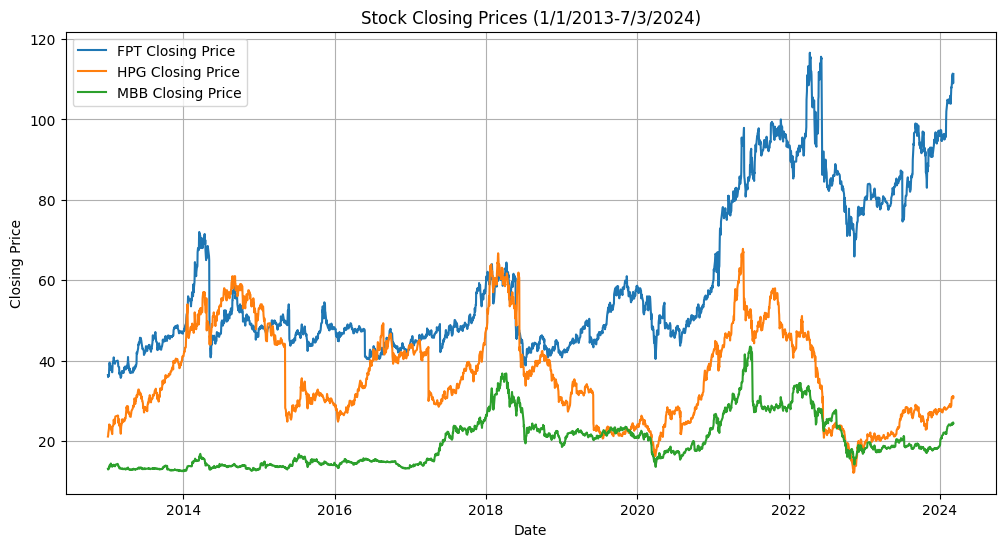

In [14]:
stock_symbols = ['FPT', 'HPG', 'MBB']
stock_dataframes = [df_FPT2, df_HPG2, df_MBB2]
plot_stock_closing_prices(stock_symbols, stock_dataframes)

In [15]:
def plot_moving_average(df, col_gia, col_ngay, ma1=50, ma2=200, stock_id=''):
    df_ma = df[[col_ngay, col_gia]].copy()
    df_ma['MA_Short'] = df_ma[col_gia].rolling(window=ma1, min_periods=1).mean()
    df_ma['MA_Long'] = df_ma[col_gia].rolling(window=ma2, min_periods=1).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df_ma[col_ngay], df_ma[col_gia], label='Giá cổ phiếu', alpha=0.5)
    plt.plot(df_ma[col_ngay], df_ma['MA_Short'], label=f'MA {ma1} days')
    plt.plot(df_ma[col_ngay], df_ma['MA_Long'], label=f'MA {ma2} days')

    plt.title(f'Đường Trung Bình Động (MA) - {stock_id}')
    plt.xlabel('Ngày giao dịch')
    plt.ylabel('Giá cổ phiếu')
    plt.legend()
    plt.grid(True)
    plt.show()


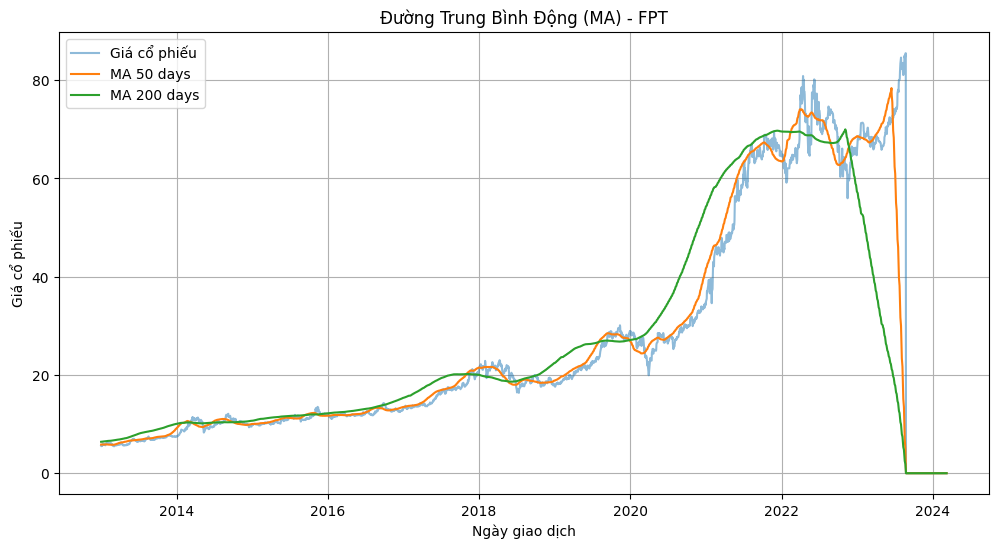

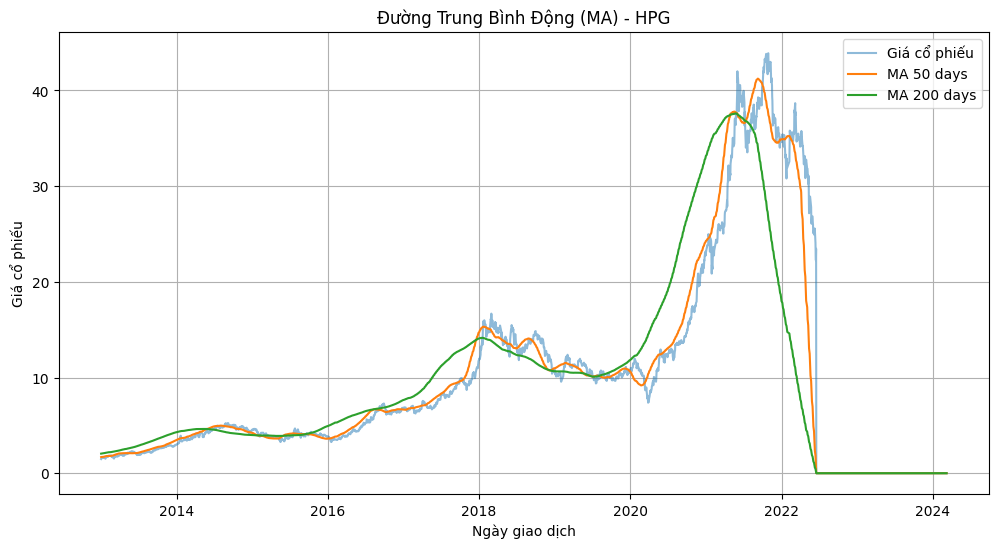

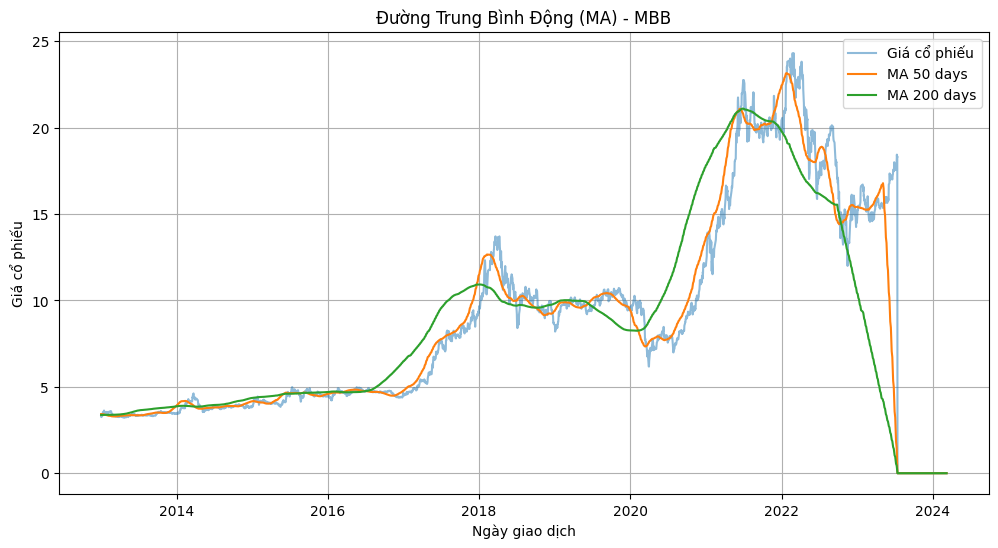

In [16]:
plot_moving_average(df_FPT2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='FPT')
plot_moving_average(df_HPG2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='HPG')
plot_moving_average(df_MBB2, 'Giá điều chỉnh', 'Ngày giao dịch', stock_id='MBB')

In [17]:
def plot_volume(df, col_GDKL_KL, col_date, stock_id=''):
    plt.figure(figsize=(12, 6))
    plt.bar(df[col_date], df[col_GDKL_KL], color='blue', alpha=0.5)
    
    plt.title(f'Phân tích Khối lượng giao dịch - {stock_id}')
    plt.xlabel('Ngày giao dịch')
    plt.ylabel('Khối lượng giao dịch')
    plt.grid(True)
    plt.show()

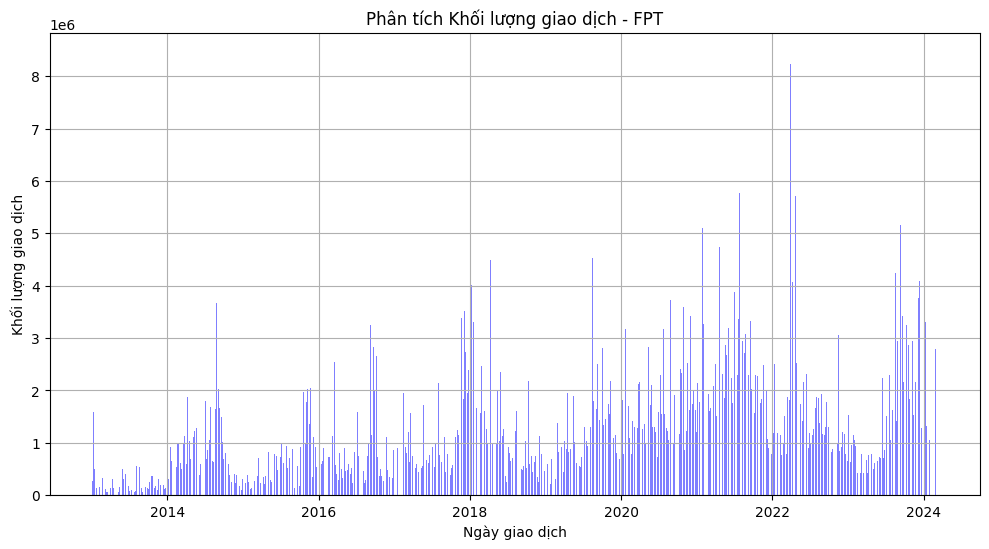

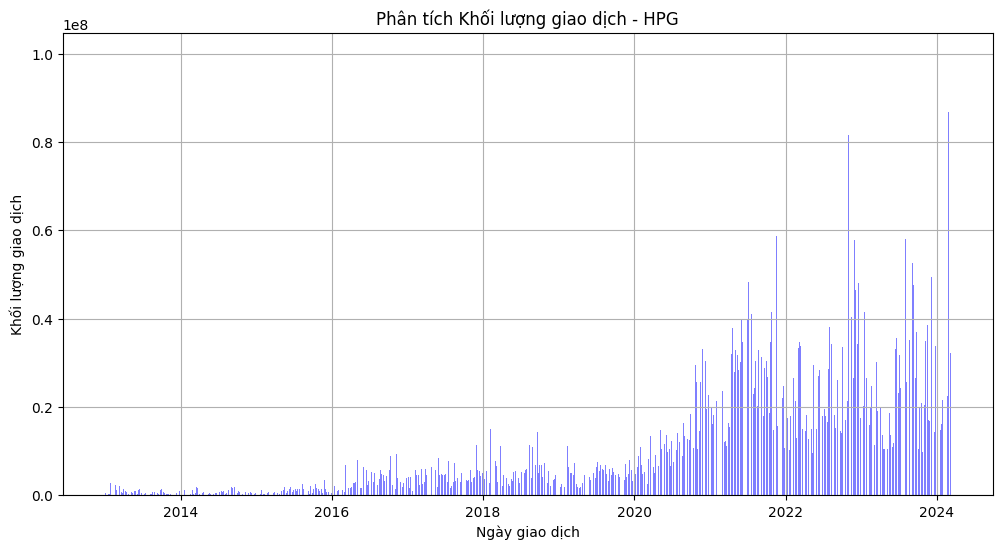

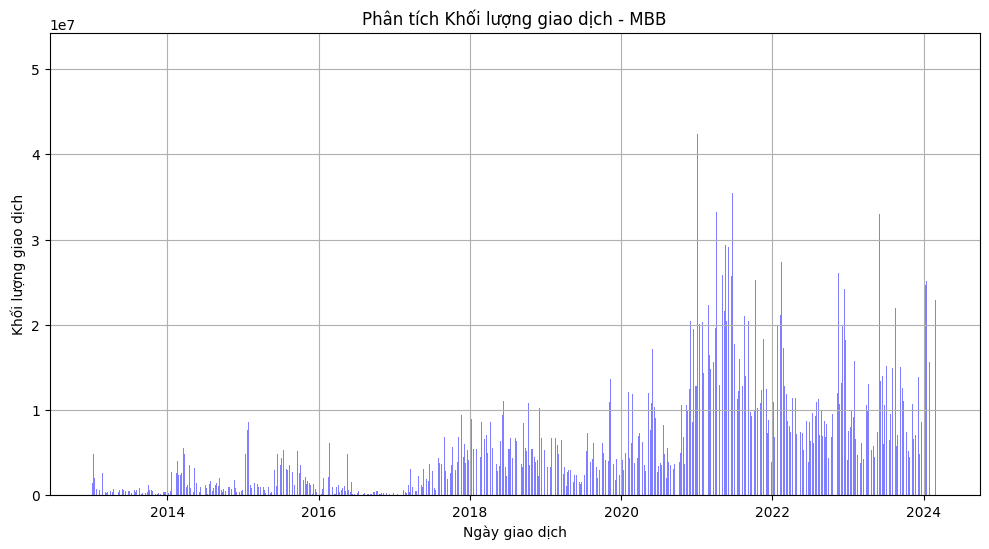

In [18]:
# Sử dụng hàm cho cổ phiếu FPT
plot_volume(df_FPT2, 'GDKL_KL', 'Ngày giao dịch', stock_id='FPT')
# Sử dụng hàm cho cổ phiếu HPG
plot_volume(df_HPG2, 'GDKL_KL', 'Ngày giao dịch', stock_id='HPG')
# Sử dụng hàm cho cổ phiếu MBB
plot_volume(df_MBB2, 'GDKL_KL', 'Ngày giao dịch', stock_id='MBB')

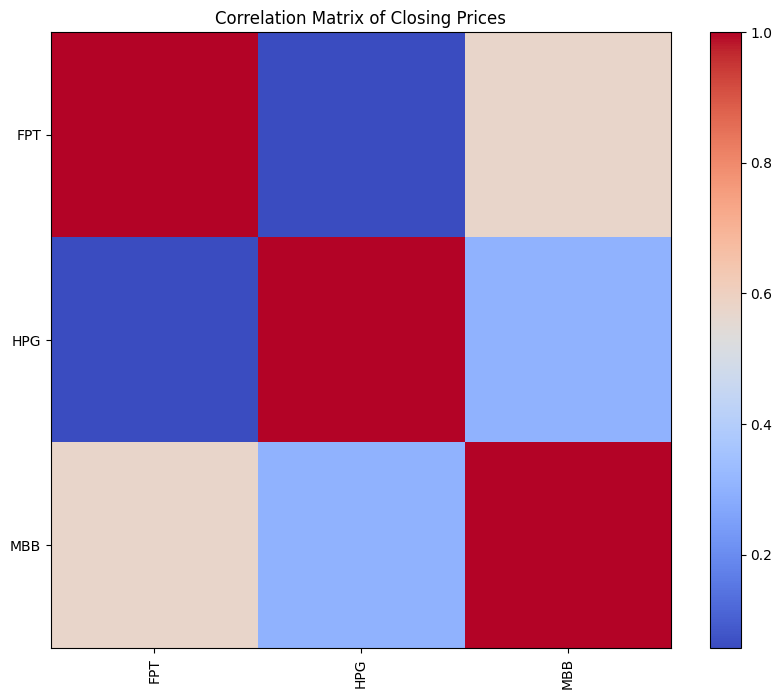

In [19]:
def plot_stock_correlation(*stock_dfs, stock_symbols=[]):
    # Combine DataFrames into a single DataFrame using the 'Ngày giao dịch' column as the index
    combined_df = pd.concat([df.set_index('Ngày giao dịch')['Giá đóng cửa'] for df in stock_dfs], axis=1, keys=stock_symbols)

    # Calculate the correlation matrix
    correlation_matrix = combined_df.corr()

    # Plot the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix of Closing Prices')
    plt.show()

# Example usage
plot_stock_correlation(df_FPT2, df_HPG2, df_MBB2, stock_symbols=['FPT', 'HPG', 'MBB'])

In [69]:
closedf_FPT2 = df_FPT2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_FPT2.shape)
closedf_FPT2.head()

Shape of close dataframe: (2786, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00         111.3
1 2024-03-06 00:00:00+00:00         109.0
2 2024-03-05 00:00:00+00:00         110.7
3 2024-03-04 00:00:00+00:00         111.4
4 2024-03-01 00:00:00+00:00         110.8

In [70]:
closedf_MBB2 = df_MBB2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_MBB2.shape)
closedf_MBB2.head()

Shape of close dataframe: (2787, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00          24.4
1 2024-03-06 00:00:00+00:00          24.6
2 2024-03-05 00:00:00+00:00          24.6
3 2024-03-04 00:00:00+00:00          24.2
4 2024-03-01 00:00:00+00:00          24.0

In [71]:
closedf_HPG2 = df_HPG2[['Ngày giao dịch','Giá đóng cửa']]
print("Shape of close dataframe:", closedf_HPG2.shape)
closedf_HPG2.head()

Shape of close dataframe: (2786, 2)


Ngày giao dịch  Giá đóng cửa
0 2024-03-07 00:00:00+00:00         31.00
1 2024-03-06 00:00:00+00:00         30.60
2 2024-03-05 00:00:00+00:00         31.15
3 2024-03-04 00:00:00+00:00         30.80
4 2024-03-01 00:00:00+00:00         30.85

In [72]:
closedf_FPT2_stock = closedf_FPT2.copy()
del closedf_FPT2['Ngày giao dịch']
scaler_fpt=MinMaxScaler(feature_range=(0,1))
closedf_FPT2=scaler_fpt.fit_transform(np.array(closedf_FPT2).reshape(-1,1))
print(closedf_FPT2.shape)

(2786, 1)


In [73]:
closedf_HPG2_stock = closedf_HPG2.copy()
del closedf_HPG2['Ngày giao dịch']
scaler_hpg=MinMaxScaler(feature_range=(0,1))
closedf_HPG2=scaler_hpg.fit_transform(np.array(closedf_HPG2).reshape(-1,1))
print(closedf_HPG2.shape)

(2786, 1)


In [74]:
closedf_MBB2_stock = closedf_MBB2.copy()
del closedf_MBB2['Ngày giao dịch']
scaler_mbb=MinMaxScaler(feature_range=(0,1))
closedf_MBB2=scaler_mbb.fit_transform(np.array(closedf_MBB2).reshape(-1,1))
print(closedf_MBB2.shape)

(2787, 1)


In [110]:
training_size_fpt=int(len(closedf_FPT2)*0.70)
test_size_fpt=len(closedf_FPT2)-training_size_fpt
train_data_fpt,test_data_fpt=closedf_FPT2[0:training_size_fpt,:],closedf_FPT2[training_size_fpt:len(closedf_FPT2),:1]
print("train_data: ", train_data_fpt.shape)
print("test_data: ", test_data_fpt.shape)

train_data:  (1950, 1)
test_data:  (836, 1)


In [76]:
training_size_mbb=int(len(closedf_MBB2)*0.70)
test_size_mbb=len(closedf_MBB2)-training_size_mbb
train_data_mbb,test_data_mbb=closedf_MBB2[0:training_size_mbb,:],closedf_MBB2[training_size_mbb:len(closedf_MBB2),:1]
print("train_data: ", train_data_mbb.shape)
print("test_data: ", test_data_mbb.shape)

train_data:  (1950, 1)
test_data:  (837, 1)


In [77]:
training_size_hpg=int(len(closedf_HPG2)*0.70)
test_size_hpg=len(closedf_HPG2)-training_size_hpg
train_data_hpg,test_data_hpg=closedf_HPG2[0:training_size_hpg,:],closedf_HPG2[training_size_hpg:len(closedf_HPG2),:1]
print("train_data: ", train_data_hpg.shape)
print("test_data: ", test_data_hpg.shape)

train_data:  (1950, 1)
test_data:  (836, 1)


In [78]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [111]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train_fpt, y_train_fpt = create_dataset(train_data_fpt, time_step)
X_test_fpt, y_test_fpt = create_dataset(test_data_fpt, time_step)

print("X_train: ", X_train_fpt.shape)
print("y_train: ", y_train_fpt.shape)
print("X_test: ", X_test_fpt.shape)
print("y_test", y_test_fpt.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (820, 15)
y_test (820,)


In [80]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train_hpg, y_train_hpg = create_dataset(train_data_hpg, time_step)
X_test_hpg, y_test_hpg = create_dataset(test_data_hpg, time_step)

print("X_train: ", X_train_hpg.shape)
print("y_train: ", y_train_hpg.shape)
print("X_test: ", X_test_hpg.shape)
print("y_test", y_test_hpg.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (820, 15)
y_test (820,)


In [81]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train_mbb, y_train_mbb = create_dataset(train_data_mbb, time_step)
X_test_mbb, y_test_mbb = create_dataset(test_data_mbb, time_step)

print("X_train: ", X_train_mbb.shape)
print("y_train: ", y_train_mbb.shape)
print("X_test: ", X_test_mbb.shape)
print("y_test", y_test_mbb.shape)

X_train:  (1934, 15)
y_train:  (1934,)
X_test:  (821, 15)
y_test (821,)


In [103]:
def plot_predicted_prices(train_predict, test_predict, closedf_stock1 ,closedf_stock2, time_step):
    trainPredictPlot = np.empty_like(closedf_stock1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step:len(train_predict) + time_step, :] = train_predict

    testPredictPlot = np.empty_like(closedf_stock1)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(closedf_stock1) - 1, :] = test_predict

    train_plotdf = pd.DataFrame({
        'Ngày giao dịch': closedf_stock2['Ngày giao dịch'],
        'Giá đóng cửa': closedf_stock2['Giá đóng cửa'],
        'train_predicted_close': trainPredictPlot.reshape(1, -1)[0].tolist(),
    })
    test_plotdf = pd.DataFrame({
        'Ngày giao dịch': closedf_stock2['Ngày giao dịch'],
        'Giá đóng cửa': closedf_stock2['Giá đóng cửa'],
        'test_predicted_close': testPredictPlot.reshape(1, -1)[0].tolist(),
    })

    fig = px.line(train_plotdf, x='Ngày giao dịch', y=['Giá đóng cửa', 'train_predicted_close'],
                  labels={'value': 'Stock price', 'Ngày giao dịch': 'Date'},
                  title='Train: Original close price vs Predicted close price')

    fig.add_scatter(x=test_plotdf['Ngày giao dịch'], y=test_plotdf['test_predicted_close'],
                    mode='lines', name='Test predicted close price')

    fig.update_layout(plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

FPT

DecisionTreeRegressor

In [157]:
param_grid_dct = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [159]:
# Create a Decision Tree Regressor
regressor_dct_fpt = DecisionTreeRegressor(random_state=0)

In [160]:
# Use GridSearchCV for hyperparameter tuning
grid_search_dct_fpt = GridSearchCV(estimator=regressor_dct_fpt, param_grid=param_grid_dct, cv=3, scoring='neg_mean_squared_error')
grid_search_dct_fpt.fit(X_train_fpt, y_train_fpt)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [161]:
# Get the best hyperparameters
best_params_dct_fpt = grid_search_dct_fpt.best_params_
print("Best Hyperparameters:", best_params_dct_fpt)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [166]:
final_regressor_dct_fpt = DecisionTreeRegressor(**best_params_dct_fpt, random_state=0)
final_regressor_dct_fpt.fit(X_train_fpt, y_train_fpt)

DecisionTreeRegressor(min_samples_split=5, random_state=0)

In [167]:
# Prediction
train_predict_dct_fpt = final_regressor_dct_fpt.predict(X_train_fpt)
test_predict_dct_fpt = final_regressor_dct_fpt.predict(X_test_fpt)

# Transform back to the original form
train_predict_dct_fpt = scaler_fpt.inverse_transform(train_predict_dct_fpt.reshape(-1, 1))
test_predict_dct_fpt = scaler_fpt.inverse_transform(test_predict_dct_fpt.reshape(-1, 1))
original_ytrain_dct_fpt = scaler_fpt.inverse_transform(y_train_fpt.reshape(-1, 1))
original_ytest_dct_fpt = scaler_fpt.inverse_transform(y_test_fpt.reshape(-1, 1))

# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_dct_fpt, train_predict_dct_fpt)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_dct_fpt, test_predict_dct_fpt)))

Train data RMSE:  0.40157904245042664
Test data RMSE:  3.1682133611754906


In [168]:
plot_predicted_prices(train_predict_dct_fpt, test_predict_dct_fpt, closedf_FPT2 ,closedf_FPT2_stock, time_step)

RandomForestRegressor

In [119]:
param_grid_rdf = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
# Create a Decision Tree Regressor
regressor_rdf_fpt = RandomForestRegressor(random_state=0)

In [120]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rdf_fpt = GridSearchCV(estimator=regressor_rdf_fpt, param_grid=param_grid_rdf, cv=3, scoring='neg_mean_squared_error')
grid_search_rdf_fpt.fit(X_train_fpt, y_train_fpt)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [121]:
# Get the best hyperparameters
best_params_rdf_fpt = grid_search_rdf_fpt.best_params_
print("Best Hyperparameters:", best_params_rdf_fpt)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [122]:
final_regressor_rdf_fpt = RandomForestRegressor(**best_params_rdf_fpt, random_state=0)
final_regressor_rdf_fpt.fit(X_train_fpt, y_train_fpt)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=0)

In [123]:
# Prediction
train_predict_rdf_fpt = final_regressor_rdf_fpt.predict(X_train_fpt)
test_predict_rdf_fpt = final_regressor_rdf_fpt.predict(X_test_fpt)

# Transform back to the original form
train_predict_rdf_fpt = scaler_fpt.inverse_transform(train_predict_rdf_fpt.reshape(-1, 1))
test_predict_rdf_fpt = scaler_fpt.inverse_transform(test_predict_rdf_fpt.reshape(-1, 1))
original_ytrain_rdf_fpt = scaler_fpt.inverse_transform(y_train_fpt.reshape(-1, 1))
original_ytest_rdf_fpt = scaler_fpt.inverse_transform(y_test_fpt.reshape(-1, 1))

# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_rdf_fpt, train_predict_rdf_fpt)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_rdf_fpt, test_predict_rdf_fpt)))

Train data RMSE:  0.9638494829762269
Test data RMSE:  1.3926468750986796


In [165]:
plot_predicted_prices(train_predict_rdf_fpt, test_predict_rdf_fpt, closedf_FPT2 ,closedf_FPT2_stock, time_step)

Xgboost

In [126]:
params_xgb = {
    'colsample_bylevel': 1,
    'colsample_bytree': 0.6,
    'gamma': 0.005,
    'learning_rate': 0.07,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 170,
    'random_state': 42,
    'subsample': 0.6
}

In [127]:
model_xgb_fpt = XGBRegressor(**params_xgb)
model_xgb_fpt.fit(X_train_fpt, y_train_fpt)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=0.6, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.005,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [128]:
# Prediction
train_predict_xgb_fpt = model_xgb_fpt.predict(X_train_fpt)
test_predict_xgb_fpt = model_xgb_fpt.predict(X_test_fpt)

In [129]:
# Transform back to original form
train_predict_xgb_fpt = scaler_fpt.inverse_transform(train_predict_xgb_fpt.reshape(-1, 1))
test_predict_xgb_fpt = scaler_fpt.inverse_transform(test_predict_xgb_fpt.reshape(-1, 1))
original_ytrain_xgb_fpt = scaler_fpt.inverse_transform(y_train_fpt.reshape(-1, 1))
original_ytest_xgb_fpt = scaler_fpt.inverse_transform(y_test_fpt.reshape(-1, 1))

In [130]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_xgb_fpt, train_predict_xgb_fpt)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_xgb_fpt, test_predict_xgb_fpt)))

Train data RMSE:  1.2620671865401587
Test data RMSE:  1.6939784213241194


In [131]:
plot_predicted_prices(train_predict_xgb_fpt, test_predict_xgb_fpt, closedf_FPT2 ,closedf_FPT2_stock, time_step)

HPG

DecisionTreeRegressor

In [169]:
regressor_dct_hpg = DecisionTreeRegressor(random_state=0)

In [170]:
# Use GridSearchCV for hyperparameter tuning
grid_search_dct_hpg = GridSearchCV(estimator=regressor_dct_hpg, param_grid=param_grid_rdf, cv=3, scoring='neg_mean_squared_error')
grid_search_dct_hpg.fit(X_train_hpg, y_train_hpg)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [171]:
# Get the best hyperparameters
best_params_dct_hpg = grid_search_dct_hpg.best_params_
print("Best Hyperparameters:", best_params_dct_hpg)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [172]:
final_regressor_dct_hpg = DecisionTreeRegressor(**best_params_dct_hpg, random_state=0)
final_regressor_dct_hpg.fit(X_train_hpg, y_train_hpg)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=0)

RandomForestRegressor

In [143]:
# Create a Decision Tree Regressor
regressor_rdf_hpg = RandomForestRegressor(random_state=0)

In [145]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rdf_hpg = GridSearchCV(estimator=regressor_rdf_hpg, param_grid=param_grid_rdf, cv=3, scoring='neg_mean_squared_error')
grid_search_rdf_hpg.fit(X_train_hpg, y_train_hpg)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [146]:
# Get the best hyperparameters
best_params_rdf_hpg = grid_search_rdf_hpg.best_params_
print("Best Hyperparameters:", best_params_rdf_hpg)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [147]:
final_regressor_rdf_hpg = RandomForestRegressor(**best_params_rdf_hpg, random_state=0)
final_regressor_rdf_hpg.fit(X_train_hpg, y_train_hpg)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      random_state=0)

In [149]:
# Prediction
train_predict_rdf_hpg = final_regressor_rdf_hpg.predict(X_train_hpg)
test_predict_rdf_hpg = final_regressor_rdf_hpg.predict(X_test_hpg)

# Transform back to the original form
train_predict_rdf_hpg = scaler_mbb.inverse_transform(train_predict_rdf_hpg.reshape(-1, 1))
test_predict_rdf_hpg = scaler_mbb.inverse_transform(test_predict_rdf_hpg.reshape(-1, 1))
original_ytrain_rdf_hpg = scaler_mbb.inverse_transform(y_train_hpg.reshape(-1, 1))
original_ytest_rdf_hpg = scaler_mbb.inverse_transform(y_test_hpg.reshape(-1, 1))

# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_rdf_hpg, train_predict_rdf_hpg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_rdf_hpg, test_predict_rdf_hpg)))

Train data RMSE:  0.4083261419993216
Test data RMSE:  0.6172552534952026


In [150]:
plot_predicted_prices(train_predict_rdf_hpg, test_predict_rdf_hpg, closedf_HPG2 ,closedf_HPG2_stock, time_step)

Xgboost

In [132]:
model_xgb_hpg = XGBRegressor(**params_xgb)
model_xgb_hpg.fit(X_train_hpg, y_train_hpg)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=0.6, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.005,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [134]:
# Prediction
train_predict_xgb_hpg = model_xgb_hpg.predict(X_train_hpg)
test_predict_xgb_hpg = model_xgb_hpg.predict(X_test_hpg)

In [135]:
# Transform back to original form
train_predict_xgb_hpg = scaler_hpg.inverse_transform(train_predict_xgb_hpg.reshape(-1, 1))
test_predict_xgb_hpg = scaler_hpg.inverse_transform(test_predict_xgb_hpg.reshape(-1, 1))
original_ytrain_xgb_hpg = scaler_hpg.inverse_transform(y_train_hpg.reshape(-1, 1))
original_ytest_xgb_hpg = scaler_hpg.inverse_transform(y_test_hpg.reshape(-1, 1))

In [136]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_xgb_hpg, train_predict_xgb_hpg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_xgb_hpg, test_predict_xgb_hpg)))

Train data RMSE:  0.9184727483323804
Test data RMSE:  1.1348808397155048


In [137]:
plot_predicted_prices(train_predict_xgb_hpg, test_predict_xgb_hpg, closedf_HPG2 ,closedf_HPG2_stock, time_step)

MBB

DecisionTreeRegressor

RandomForestRegressor

In [151]:
# Create a Decision Tree Regressor
regressor_rdf_mbb = RandomForestRegressor(random_state=0)

In [152]:
# Use GridSearchCV for hyperparameter tuning
grid_search_rdf_mbb = GridSearchCV(estimator=regressor_rdf_mbb, param_grid=param_grid_rdf, cv=3, scoring='neg_mean_squared_error')
grid_search_rdf_mbb.fit(X_train_mbb, y_train_mbb)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [153]:
# Get the best hyperparameters
best_params_rdf_mbb = grid_search_rdf_mbb.best_params_
print("Best Hyperparameters:", best_params_rdf_mbb)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [154]:
final_regressor_rdf_mbb = RandomForestRegressor(**best_params_rdf_mbb, random_state=0)
final_regressor_rdf_mbb.fit(X_train_mbb, y_train_mbb)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=0)

In [155]:
# Prediction
train_predict_rdf_mbb = final_regressor_rdf_mbb.predict(X_train_mbb)
test_predict_rdf_mbb = final_regressor_rdf_mbb.predict(X_test_mbb)

# Transform back to the original form
train_predict_rdf_mbb = scaler_mbb.inverse_transform(train_predict_rdf_mbb.reshape(-1, 1))
test_predict_rdf_mbb = scaler_mbb.inverse_transform(test_predict_rdf_mbb.reshape(-1, 1))
original_ytrain_rdf_mbb = scaler_mbb.inverse_transform(y_train_mbb.reshape(-1, 1))
original_ytest_rdf_mbb = scaler_mbb.inverse_transform(y_test_mbb.reshape(-1, 1))

# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_rdf_mbb, train_predict_rdf_mbb)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_rdf_mbb, test_predict_rdf_mbb)))

Train data RMSE:  0.4238930518147218
Test data RMSE:  0.27955647172600406


In [156]:
plot_predicted_prices(train_predict_rdf_mbb, test_predict_rdf_mbb, closedf_MBB2 ,closedf_MBB2_stock, time_step)

Xgboost

In [138]:
model_xgb_mbb = XGBRegressor(**params_xgb)
model_xgb_mbb.fit(X_train_mbb, y_train_mbb)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=0.6, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.005,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [139]:
# Prediction
train_predict_xgb_mbb = model_xgb_mbb.predict(X_train_mbb)
test_predict_xgb_mbb = model_xgb_mbb.predict(X_test_mbb)

In [140]:
# Transform back to original form
train_predict_xgb_mbb = scaler_mbb.inverse_transform(train_predict_xgb_mbb.reshape(-1, 1))
test_predict_xgb_mbb = scaler_mbb.inverse_transform(test_predict_xgb_mbb.reshape(-1, 1))
original_ytrain_xgb_mbb = scaler_mbb.inverse_transform(y_train_mbb.reshape(-1, 1))
original_ytest_xgb_mbb = scaler_mbb.inverse_transform(y_test_mbb.reshape(-1, 1))

In [141]:
# Evaluation metrics
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_xgb_mbb, train_predict_xgb_mbb)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_xgb_mbb, test_predict_xgb_mbb)))

Train data RMSE:  0.5056548468034667
Test data RMSE:  0.48120113867003367


In [142]:
plot_predicted_prices(train_predict_xgb_mbb, test_predict_xgb_mbb, closedf_MBB2 ,closedf_MBB2_stock, time_step)